## Global Land Temperatures

Este es un pequeño proyecto realizado en el curso de Manipulación y Análisis de Datos con Pandas de Platzi, en el cual le hago un preprocesamiento a 6 datasets (1 de Kaggle y 5 de The World Bank) y luego saco unos insights.

In [1]:
import pandas as pd
import numpy as np

Empezamos importando el dataset de la temperatura global (proveniente de Kaggle) y explorándolo un poco.

In [2]:
df = pd.read_csv('/work/GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
df.shape

(577462, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
df['dt'] = pd.to_datetime(df['dt'])
df.rename(columns={'dt':'date'}, inplace=True)
df['date']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: date, Length: 577462, dtype: datetime64[ns]

Como pudimos ver, en le dataset había muchos datos faltantes. Una forma de resolver esto, en este caso, es crear un filtro en el cual solo se mantendrán las fechas mayores a 1970 (como voy a hacer a continuación), ya que de la mayoría de los países no tenemos registros de años anteriores a 1970 (al menos no en este dataset).

In [7]:
idx = df['date'] > pd.to_datetime('1970-01-01')
df = df[idx]
df

,date,AverageTemperature,AverageTemperatureUncertainty,Country
2715,1970-02-01,-10.835,0.478,Åland
2716,1970-03-01,-1.583,0.608,Åland
2717,1970-04-01,0.493,0.463,Åland
2718,1970-05-01,6.939,0.565,Åland
2719,1970-06-01,14.252,0.676,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Ahora agrupo el dataframe por país y fecha con frecuencia de un año para poder manipularlo mejor en intervalos de tiempo, le aplico la media y la media para ver las variaciones de temperatura y lo grafico para poder verlo de manera mas sencilla.

In [8]:
df_t_avg = df.groupby(['Country',
           pd.Grouper(key='date', freq='1Y')]).agg({'AverageTemperature':[np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     date                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='date'>

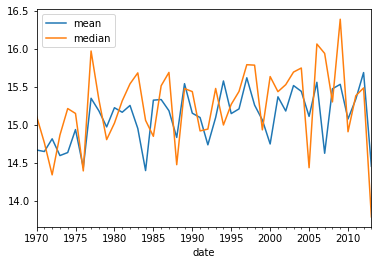

In [9]:
df_t_avg.xs('Argentina')['AverageTemperature'].plot()

Como el promedio puede estar sesgado por valores atípicos (outliers) vamos a quedarnos con la mediana como mediad de la temperatura de todo el año.

In [10]:
df_t_med = df_t_avg['AverageTemperature']['median'].reset_index()
df_t_med

,Country,date,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


Acá creamos una nueva columna en el dataframe llamada "year" que contiene solo los años en formato datetime. Esta columna nos va a servir mas adelante.

In [11]:
df_t_med['year'] = df_t_med['date'].dt.year
df_t_med['year']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: year, Length: 10692, dtype: int64

In [12]:
df_t_med

,Country,date,median,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Cambiamos el nombre de la columna "median" por algo mas representativo como lo es "temperature".

In [13]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [14]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='year', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
year,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


Ahora vamos a cargar los datasets de The World Bank que son de la agricultura, los bosques, la generación de electricidad, el nivel de co2 y la población, todo a nivel mundial.

In [15]:
df_agri = pd.read_csv('/work/API_AG.LND.AGRI.K2_DS2_en_csv_v2_4032793.csv', header = 2)
df_fore = pd.read_csv('/work/API_AG.LND.FRST.K2_DS2_en_csv_v2_4019655.csv', header = 2)
df_elec = pd.read_csv('/work/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_4028584.csv', header = 2)
df_co2e = pd.read_csv('/work/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4022915.csv', header = 2)
df_popu = pd.read_csv('/work/API_SP.POP.TOTL_DS2_en_csv_v2_4019998.csv', header = 2)

Los datasets tiene información sobre:

- La cantidad de co2 en el aire.
- La cantidad de bosques deforestados (km2).
- La agricultura de cada pais por km2.
- La poblacion de cada pais (7mM).
- La electricidad consumida por cada pais (kWh).

In [16]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,NaN,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN,NaN


&nbsp;Creamos&nbsp;un&nbsp;filtro&nbsp;con&nbsp;los&nbsp;nombres&nbsp;de&nbsp;las&nbsp;columnas y los años&nbsp;que&nbsp;queremos conservar.

In [17]:
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

Aplicamos el filtro al primer dataframe, le hacemos un melt y le cambiamos el nombre de las columnas.

In [18]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(columns={'variable':'year',
                                                                                  'Country Name':'Country',
                                                                                  'Country Code	':'name',
                                                                                  'value':'agriculture'})

,Country,Country Code,year,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


Como los datasets de The World Bank tiene todos el mismo formato podemos crear una función para automatizar un poco el proceso de darles el mismo formato.

In [19]:
def fun_format(df, col='agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(columns={'variable':'year',
                                                                                  'Country Name':'Country',
                                                                                  'Country Code':'name',
                                                                                  'value':col})

Con la función lista ya podemos pasar los dataframes y que queden listos para unirlos.

In [20]:
df_agri = fun_format(df_agri, col='agriculture')
df_fore = fun_format(df_fore, col='forest')
df_elec = fun_format(df_elec, col='electricprod')
df_co2e = fun_format(df_co2e, col='co2')
df_popu = fun_format(df_popu, col='population')

In [21]:
df_popu

,Country,name,year,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [22]:
df_t_med

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Una vez que lo dataframes ya estén formateados, solo nos falta acomodar el formato de las columnas "year" para que no de error el merge.

In [23]:
df_popu['year']=df_popu['year'].astype(float)
df_fore['year']=df_fore['year'].astype(float)
df_agri['year']=df_agri['year'].astype(float)
df_elec['year']=df_elec['year'].astype(float)
df_co2e['year']=df_co2e['year'].astype(float)

In [24]:
df_merge = pd.merge(df_t_med[['Country','temperature','year']],
                    df_popu, on = ['Country','year'], how='inner')

In [25]:
df_merge = pd.merge(df_merge, df_co2e, on=['Country', 'name', 'year'], how='inner')

df_merge = pd.merge(df_merge, df_elec, on=['Country', 'name', 'year'], how='inner')

df_merge = pd.merge(df_merge, df_agri, on=['Country', 'name', 'year'], how='inner')

df_merge = pd.merge(df_merge, df_fore, on=['Country', 'name', 'year'], how='inner')

In [26]:
df_merge

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475450.0,NaN,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791222.0,NaN,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,NaN,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412960.0,NaN,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689164.0,NaN,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.0,585.457099,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.0,606.643960,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.0,636.248991,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.0,608.761669,162000.0,178131.4


Con el dataframe ya unido podemos ver que tenemos datos faltantes, esto lo voy a solucionar solo eliminando las filas a las que les falten datos.

In [27]:
df_climate = df_merge.dropna()
df_climate

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,6050.0,552.252185,11210.0,7888.0
63,Albania,11.5885,1991,ALB,3266790.0,4110.0,418.453589,11270.0,7868.5
64,Albania,13.5850,1992,ALB,3247039.0,2240.0,453.644074,11270.0,7849.0
65,Albania,13.6500,1993,ALB,3227287.0,2070.0,536.363825,11260.0,7829.5
66,Albania,13.2390,1994,ALB,3207536.0,2140.0,596.407959,11260.0,7810.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.0,585.457099,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.0,606.643960,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.0,636.248991,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.0,608.761669,162000.0,178131.4


## Terminamos de unir y procesar los csvs en uno solo. Ahora podemos sacar algunos insights del dataframe.

Por ejemplo, una pregunta que nos podemos hacer es ¿Cuál es el país que mas co2 genero?

In [28]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
United States    5470430.0
China            3667540.0
Japan            1173390.0
India             970705.0
Germany           833265.0
                   ...    
Suriname            1500.0
Mozambique          1500.0
Togo                1430.0
Niger                805.0
Eritrea              640.0
Name: co2, Length: 119, dtype: float64

Que seria United States.

O de los 10 países que mas co2 generaron ¿Cuál es su relación entre el co2 generado y la población?

In [29]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['United States', 'China', 'Japan', 'India', 'Germany', 'United Kingdom',
       'Canada', 'Italy', 'Mexico', 'France'],
      dtype='object', name='Country')

In [30]:
df_max_co2 = df_climate[df_climate['Country'].isin(list(first_10))]
df_max_co2

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6380,1990,CAN,27691138.0,419120.0,16167.374559,614030.000,3482729.30
1267,Canada,-4.2405,1991,CAN,28037420.0,412930.0,16181.588748,615332.464,3482258.34
1268,Canada,-5.0440,1992,CAN,28371264.0,426000.0,16164.419040,614650.000,3481787.38
1269,Canada,-4.0330,1993,CAN,28684764.0,422680.0,16320.127298,613970.000,3481316.42
1270,Canada,-3.4375,1994,CAN,29000663.0,438820.0,16388.280502,613290.000,3480845.46
...,...,...,...,...,...,...,...,...,...
7004,United States,8.3530,2009,USA,306771529.0,5159550.0,12913.714688,4089470.000,3082016.00
7005,United States,10.2315,2010,USA,309327143.0,5392870.0,13394.902755,4069917.000,3087200.00
7006,United States,9.5360,2011,USA,311583481.0,5172100.0,13245.881928,4050364.000,3089950.00
7007,United States,9.9420,2012,USA,313877662.0,4950210.0,12964.187939,4030810.538,3092700.00


<AxesSubplot:xlabel='population', ylabel='co2'>

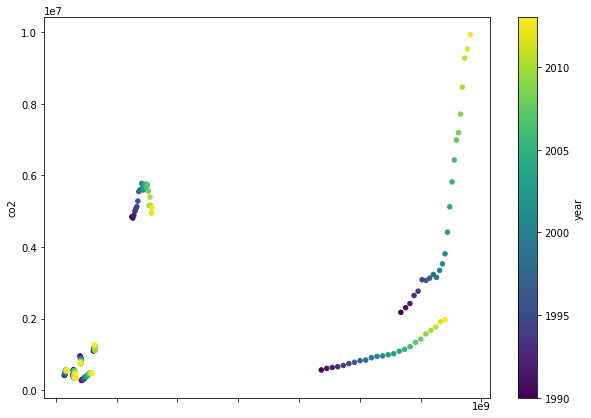

In [31]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',  
    y='co2',
    c='year',
    colormap='viridis',
    figsize=(10,7)
)

Una forma mas sencilla de ver la relación entre las distintas columnas del dataframe es con mapa de calor donde se grafique la correlación entre estas.

In [32]:
df_climate.corr()

,temperature,year,population,co2,electricprod,agriculture,forest
temperature,1.000000,0.020975,0.000068,-0.154853,-0.431984,-0.050000,-0.052190
year,0.020975,1.000000,0.015635,0.036858,0.085133,-0.010717,-0.016920
population,0.000068,0.015635,1.000000,0.667783,-0.078342,0.634467,0.342149
co2,-0.154853,0.036858,0.667783,1.000000,0.123605,0.715716,0.458070
electricprod,-0.431984,0.085133,-0.078342,0.123605,1.000000,0.039908,0.101528
agriculture,-0.050000,-0.010717,0.634467,0.715716,0.039908,1.000000,0.601667
forest,-0.052190,-0.016920,0.342149,0.458070,0.101528,0.601667,1.000000


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

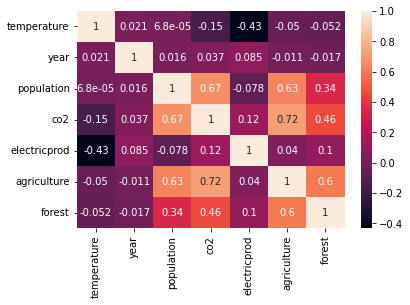

In [34]:
sns.heatmap(df_climate.corr(), annot=True)

En este mapa de calor se muestra la correlación entre columnas ordenadas por país.

In [35]:
df_med = df_climate.groupby('year').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
year,,,,,,
1990,22.70675,10213861.5,29225.0,1114.674407,90195.0,60215.0000
1991,22.45000,10319927.0,27260.0,1048.855983,91640.0,62993.2000
1992,19.90650,9544055.0,23780.0,1446.538811,87800.0,46668.0000
1993,20.72750,9790619.0,23910.0,1514.743634,79750.0,45578.2200
1994,20.72700,9991525.0,24280.0,1576.767198,81290.0,45412.9600
1995,20.05550,10026176.0,25400.0,1578.339317,74070.0,44851.5000
1996,20.18450,10063945.0,27740.0,1687.085238,76820.0,44151.5000
1997,20.37750,10108977.0,27950.0,1762.410629,78440.0,43451.5000
1998,21.47300,10071963.0,27340.0,1807.324282,80270.0,42751.5000


<AxesSubplot:>

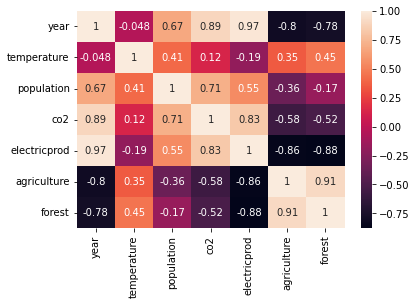

In [36]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

En este mapa de calor se muestra la correlación entre columnas ordenadas por año.

Con el mapa de calor por año se representan mejor las relaciones a nivel global, mientras que con el otro se representan mejor las relaciones a nivel país.

Por ejemplo, podemos ver a nivel global la relación entre los bosques y la columna tiempo o vease como los bosques a lo largod e los años que por el coeficiente del mapa de calor sabemos que tiene una relación negativa.

<AxesSubplot:xlabel='year', ylabel='forest'>

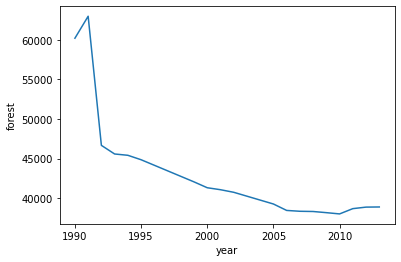

In [37]:
sns.lineplot(x=df_med.index, y=df_med.forest)

O ¿Cuál es el paisa de américa del sur que mas consumo de electricidad tiene?

In [71]:
 sudamerica = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad and Tobago','Uruguay','Venezuela','Guyana']
 df_americas = df_climate[df_climate['Country'].isin(list(sudamerica))].groupby('Country').sum()
 consumo_electrico_americas = df_americas.electricprod.sort_values(ascending=False)
 consumo_electrico_americas

Country
Chile        62111.632140
Argentina    51575.026062
Uruguay      48909.522710
Brazil       46118.365321
Suriname     39835.466726
Colombia     22777.131775
Paraguay     21448.348005
Ecuador      18978.159045
Peru         18931.920579
Bolivia      10734.552223
Name: electricprod, dtype: float64

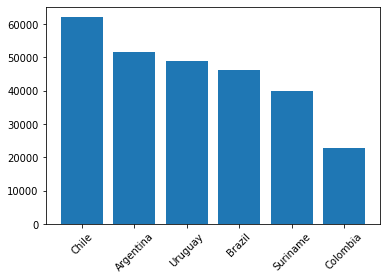

In [73]:
plt.bar(x=consumo_electrico_americas.index[:6], height=consumo_electrico_americas[:6])
plt.xticks(rotation = '45')
plt.show()

Como podemos ver el país que mas consumo eléctrico tuvo fue Chile.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1033b61-9eb3-4328-a9d3-0c227b7533b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>